## Time Series Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import packages
import numpy as np
import pandas as pd
import datetime as dt

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
# load the data
X = pd.read_csv('X.csv',index_col= 'Date', parse_dates=True, low_memory=False)
X.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,...,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,CompetitionDuration,Promo2Duration
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,0,1,2015,7,31,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,82.0,0.0
2015-07-30,1,4,5020,546,1,0,1,2015,7,30,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,82.0,0.0
2015-07-29,1,3,4782,523,1,0,1,2015,7,29,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,82.0,0.0
2015-07-28,1,2,5011,560,1,0,1,2015,7,28,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,82.0,0.0
2015-07-27,1,1,6102,612,1,0,1,2015,7,27,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,82.0,0.0


### Visualising Time Series

First, let's plot some sample stores sales over time

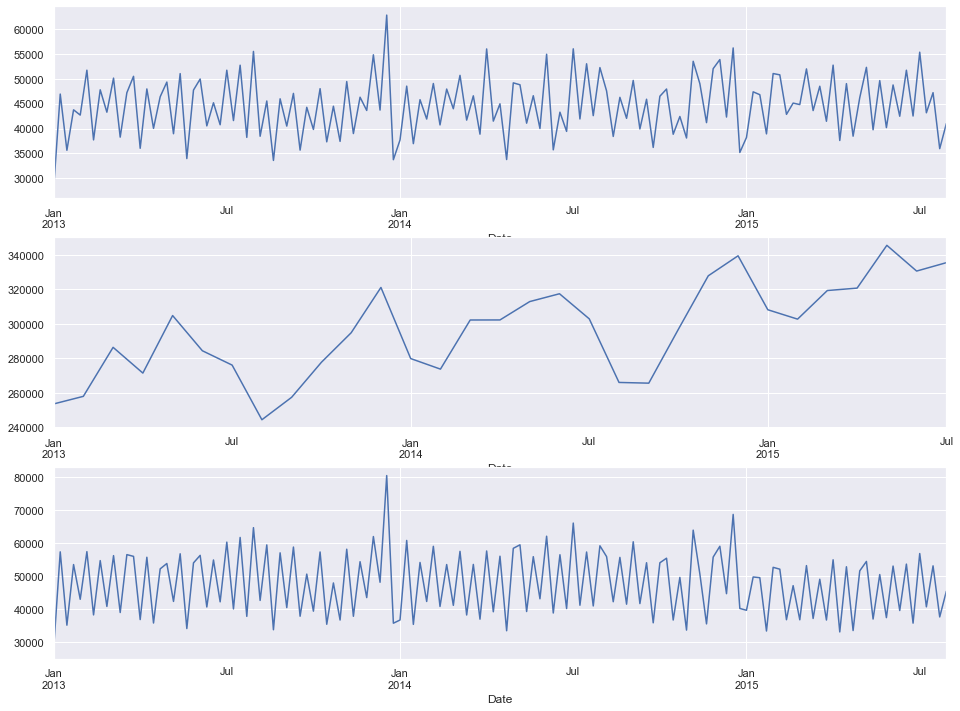

In [3]:
# Select 3 random samples
sample_1 = X[X.Store == 200]['Sales']    # store type a
sample_2 = X[X.Store == 1097]['Sales']   # store type b
sample_3 = X[X.Store == 579]['Sales']    # store type c

f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(16, 12))

sample_1.resample('W').sum().plot(ax=ax1)
sample_2.resample('M').sum().plot(ax=ax2)
sample_3.resample('W').sum().plot(ax=ax3);

What we can see from above are that, the sales at 3 sample stores all seem to jump during Christmas season and fall sharply around January.

#### Seasonal Decomposition

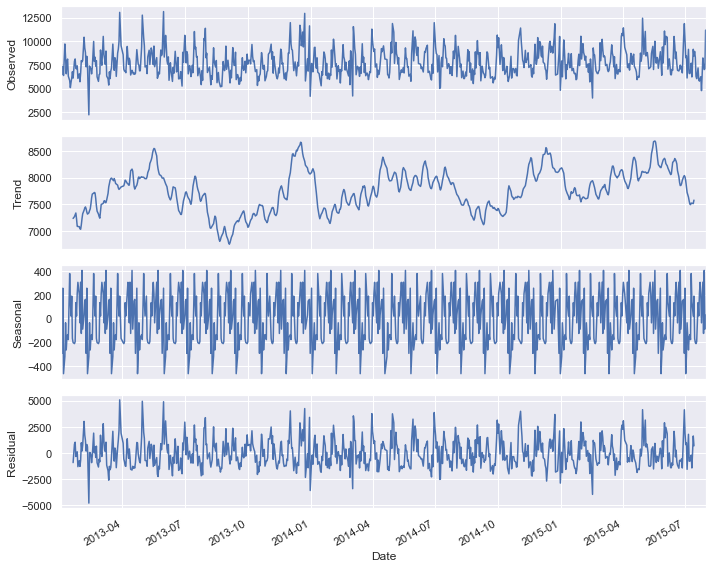

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8            # adjust figure size


decompose_sample_1 = seasonal_decompose(sample_1,freq=30)  # set frequency as monthly
decompose_sample_1.plot();


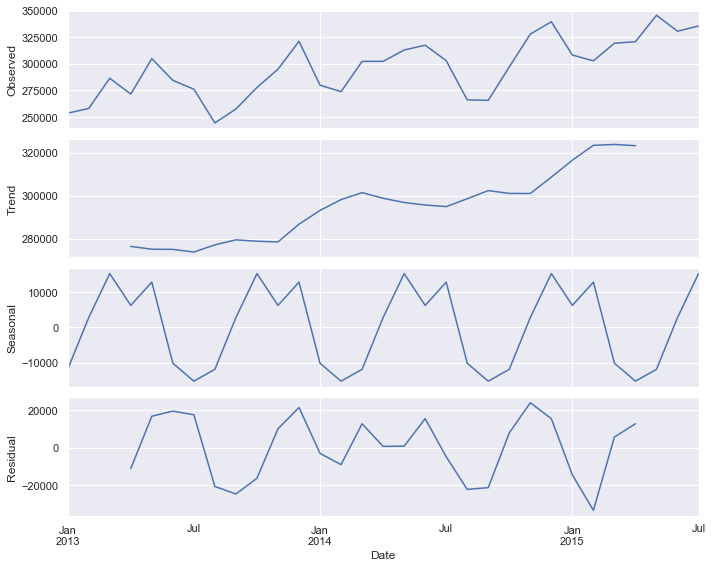

In [5]:
sample_2_m = sample_2.resample('M').sum()
decompose_sample_2_m = seasonal_decompose(sample_2_m,freq=7)
decompose_sample_2_m.plot();


#### Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF)

- ACF gives the values of autocorrelation of any time series with its lagged values.
- PACF gives the correlation of the residuls with the next lagged values, hence 'partial'

The vertical axis ranges from (–1, 1), if a spike is significantly different from zero, it signifies autocorrelation.

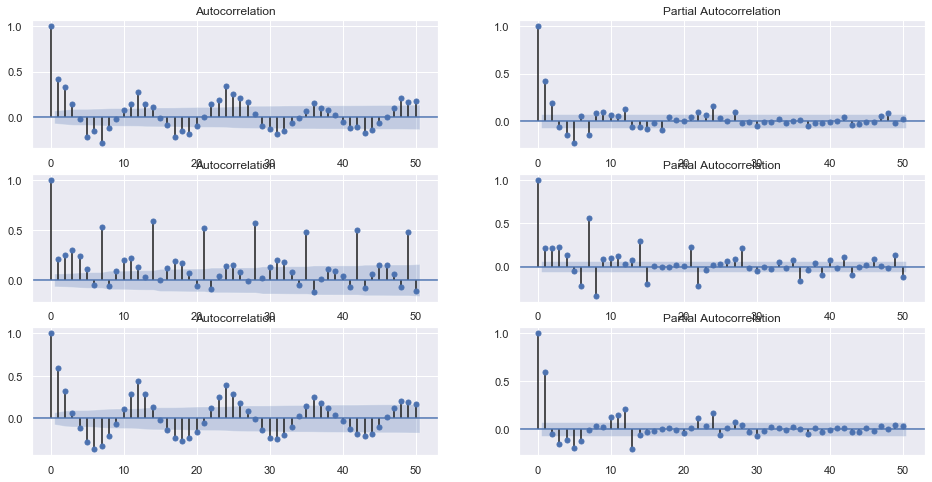

In [6]:
# Create the canvas for plotting
plt.figure(figsize = (16, 12))


# ACF and PACF for sample_1
plt.subplot(3,2,1); plot_acf(sample_1, lags = 50, ax = plt.gca())
plt.subplot(3,2,2); plot_pacf(sample_1, lags = 50, ax = plt.gca())

# ACF and PACF for sample_2
plt.subplot(3,2,3); plot_acf(sample_2, lags = 50, ax = plt.gca())
plt.subplot(3,2,4); plot_pacf(sample_2, lags = 50, ax = plt.gca())

# ACF and PACF for sample_3
plt.subplot(3,2,5); plot_acf(sample_3, lags = 50, ax = plt.gca())
plt.subplot(3,2,6); plot_pacf(sample_3, lags = 50, ax = plt.gca());


A general observation is that all the 3 samples have autocorrelations. And they are non-stationary time series, as the ACF drop to zero relatively slowly,

- Sample_1 (StoreType a) shows seasonalities at every 12$^{th}$ lags, i.e. it got positives spikes at every 12s. The plot also suggest each value is correlated with its adjacent values.
- Sample_2 (StoreType b) shows a weekly trend with positives spikes at every 7$^{th}$ lags.
- Sample_3 (StoreType c) shows similarly seasonablities with sample_1. It got spikes at every 12$^{th}$ and each value is coorrelated to its adjacent values.

### Exponentially Weighted Moving Average (EWMA)

We use sample 3 to illustrate the EWMA method.

In [7]:
sample_1 = sample_1.to_frame()
sample_1['EWMA'] = sample_1['Sales'].ewm(halflife=3,      # halflife is the period of time for the ew to reduce to one half.
                                            ignore_na=False,
                                            min_periods=0,
                                            adjust=True).mean()
sample_1.head()

,Sales,EWMA
Date,,
2015-07-31,11177,11177.000000
2015-07-30,7103,8905.717843
2015-07-29,7013,8124.784452
2015-07-28,7465,7899.113815
2015-07-27,8241,8002.075724


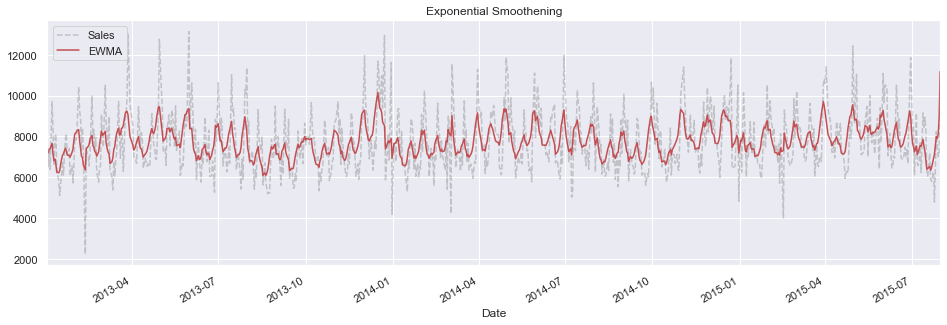

In [8]:
# Plot the EWMA
sample_1.Sales.plot(style='k--', alpha=0.2, figsize=(16,5))
sample_1.EWMA.plot(style='r-')
plt.title('Exponential Smoothening')
plt.legend()

### AutoRegressive Integrated Moving Average (ARIMA)

After completing this tutorial, you will learn:

- the parameters used and assumptions made by the ARIMA model.
- how to fit an ARIMA model to data and use it for time series forecasting.
- how to configure the ARIMA model on your time series problem.

ARIMA is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

In [9]:
# Import packages
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [10]:
# We use sample_3 to illustrate ARIMA forecasting

train = sample_3[int(0.2*(len(sample_3))):]         # create training set 
train = train[::-1]                                 # reverse the index
valid = sample_3[:int(0.2*(len(sample_3)))]         # create validation set
valid = valid[::-1]

Recall that,

- **p** is the order of the AR term
- **d** is the number of differencing required to make the time series stationary
- **q** is the order of the MA term

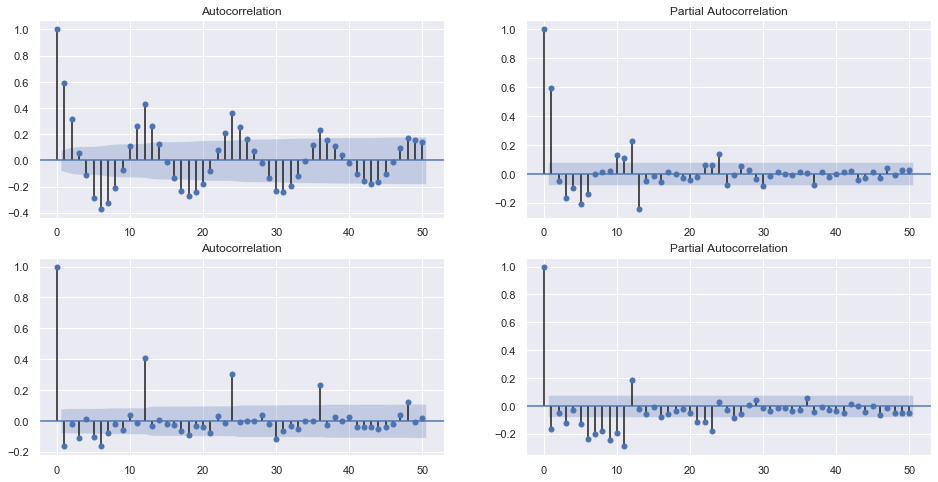

In [11]:
# Plot first differencing
plt.figure(figsize = (16, 8))

# ACF and PACF for non-differencing
plt.subplot(2,2,1); plot_acf(train, lags = 50, ax = plt.gca())
plt.subplot(2,2,2); plot_pacf(train, lags = 50, ax = plt.gca())

# ACF and PACF for 1st differencing
plt.subplot(2,2,3); plot_acf(train.diff().dropna(), lags = 50, ax = plt.gca())
plt.subplot(2,2,4); plot_pacf(train.diff().dropna(),lags = 50, ax = plt.gca())

plt.show()

**Determining p, d, q values**

- **d**: lookint at the first differenced autocorrelation plot, the lag goes into the negative zone fairly quick, which may suggest the series have been over differenced. Non-differencing seems already stationary. So, let's fix d=0.

- **p**: let's look at the non-differenced PACF plot for p value; lag 1 is well over the significance line,let's initially fix p = 1.

- **q**: looking at the non-differenced ACF plot, 2 lags are well over the significance line. Thus, let's set q = 2.

**Rule of thumb**: if a series is slightly under differenced, adding one or more additional AR terms (i.e. *p*) usually makes it up. While, if it is slightly over-differenced, try adding an additional MA term (i.e. *q*).

In [42]:
arima = ARIMA(train, order=(1, 0, 2))           # order (p, d, q)
arima_fit = arima.fit(disp=-1, trend='c')

D:\APPS\Conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [43]:
print(arima_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  624
Model:                     ARMA(1, 2)   Log Likelihood               -5556.213
Method:                       css-mle   S.D. of innovations           1780.900
Date:                Sun, 08 Sep 2019   AIC                          11122.425
Time:                        11:55:13   BIC                          11144.606
Sample:                             0   HQIC                         11131.045
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8394.1346    160.471     52.309      0.000    8079.617    8708.652
ar.L1.Sales     0.3760      0.106      3.531      0.000       0.167       0.585
ma.L1.Sales     0.2385      0.110      2.163    

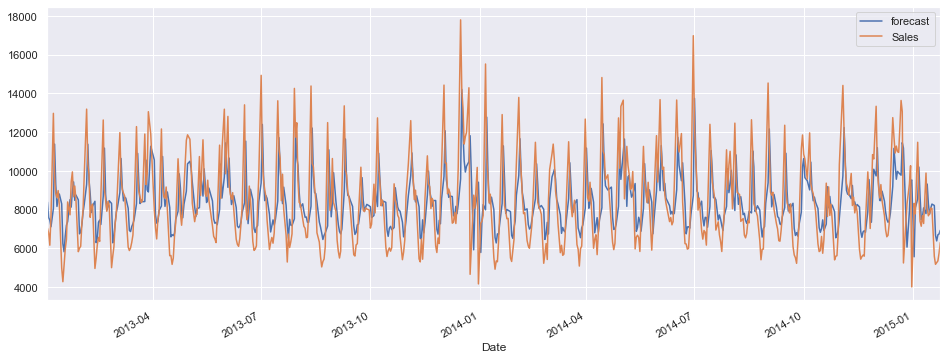

In [44]:
plt.figure(figsize=(16, 6))
arima_fit.plot_predict(ax=plt.gca());
plt.show()

In [45]:
fc, se, conf_int = arima_fit.forecast(len(valid), alpha=0.05)    # at 95% confidence interval

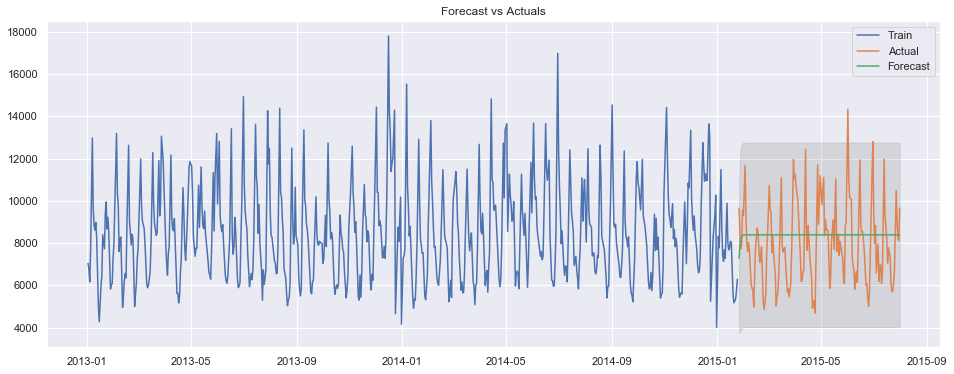

In [46]:
# Make as pandas series for plotting
fc_series = pd.Series(fc, index=valid.index)
lower_series = pd.Series(conf_int[:, 0], index=valid.index)
upper_series = pd.Series(conf_int[:, 1], index=valid.index)

# Plot ARIMA forecase vs. Actual
plt.figure(figsize=(16,6))
plt.plot(train, label='Train')
plt.plot(valid, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.1)
plt.title('Forecast vs Actuals')
plt.legend();

How to select order automatically? Let's try auto_arima

In [34]:
model = pm.auto_arima(train, start_p=1, start_q=1, 
                      start_P=1, start_Q=1,    
                      max_p=10, max_q=10,        # maximum p and q          
                      m=12,                      # frequency of series
                      d=None,                    # let model determine 'd'
                      seasonal=True,             # Seasonality, which becomes SARIMA model.
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 12); AIC=11044.488, BIC=11071.105, Fit time=1.285 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=11395.351, BIC=11404.223, Fit time=0.015 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=11051.441, BIC=11069.186, Fit time=0.515 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=11122.560, BIC=11140.305, Fit time=0.560 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=11050.049, BIC=11072.230, Fit time=0.675 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 1, 12); AIC=11023.393, BIC=11054.446, Fit time=3.885 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 0, 12); AIC=11037.084, BIC=11063.701, Fit time=4.556 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 2, 12); AIC=11022.377, BIC=11057.866, Fit time=6.860 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(2, 0, 2, 12); AIC=11121.461, BIC=11152.514, Fit time=6.396 seconds
Fit ARIMA:

AIC still very high, no good.

In [47]:
print(model.summary())  # print best model summary

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  624
Model:             SARIMAX(3, 0, 2)x(1, 0, 2, 12)   Log Likelihood               -5492.045
Date:                            Sun, 08 Sep 2019   AIC                          11004.091
Time:                                    11:55:39   BIC                          11048.452
Sample:                                         0   HQIC                         11021.329
                                            - 624                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6314.8858   1862.574      3.390      0.001    2664.308    9965.464
ar.L1         -1.3176      0.036   

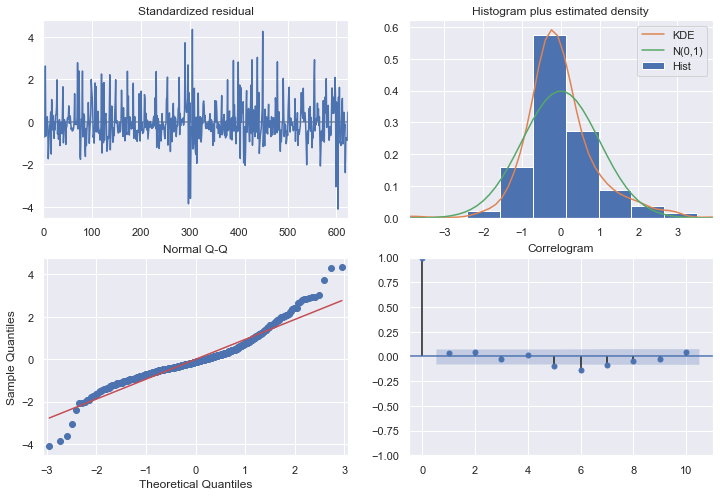

In [48]:
# Plot an ARIMA's diagnostics
model.plot_diagnostics(figsize=(12, 8))
plt.show();

How to interpret the plot?

**Top left**: The residual errors seem to fluctuate around central mean of zero and have a uniform variance.

**Top Right**: The density plot suggest normal distribution with a mean of zero.

**Bottom left**: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed. In this case, majority of the dots are in line with the red line, with a few exceptions.

**Bottom Right**: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems a good fit.

In [49]:
# Create predictions for the future, evaluate on test
pred, conf_int = model.predict(n_periods=valid.shape[0],
                           return_conf_int=True, alpha=0.05)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(valid, pred)))

Test RMSE: 1976.061


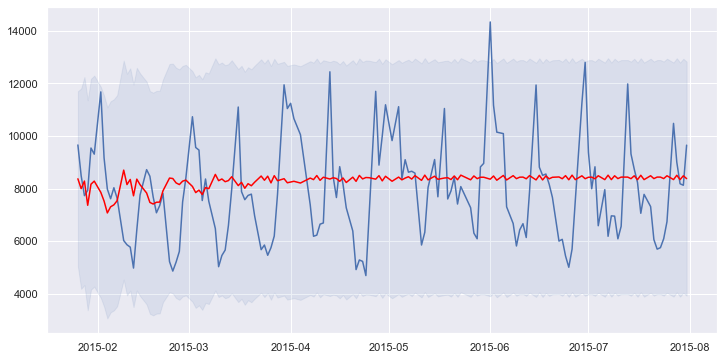

In [50]:
# make series for plotting purpose
pred_series = pd.Series(pred, index=valid.index)
lower_series = pd.Series(conf_int[:, 0], index=valid.index)
upper_series = pd.Series(conf_int[:, 1], index=valid.index)


plt.figure(figsize=(12, 6))
plt.plot(valid)
plt.plot(pred_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, upper_series,
                 alpha=0.1, color='b')

Still not the best result we would have expected.